In [285]:
global_sils_indexes = {}
global_dunns_indxs = {}
global_indxs = []

In [286]:
import numpy as np
import tensorflow as tf
import math as mt
import cv2 as cv
from scipy.spatial import distance
import random
from sklearn.metrics import silhouette_samples,silhouette_score, pairwise_distances
import sys
from validclust import dunn
from matplotlib import pyplot as plt

from scipy.spatial.distance import cdist

import keras
from keras import regularizers
from keras import layers

In [287]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() #Loading and Splitting Cifar10 dataset from Keras
x_test = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_test]) / 255.0  #Grayscaling and normalizing the dataset
shape = x_test.shape
x_test = x_test.reshape(shape[0], shape[1]*shape[2]) #Reshaping the dataset for easier computations

x_train = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_train]) / 255.0
shape = x_train.shape
x_train = x_train.reshape(shape[0], shape[1]*shape[2])

In [288]:
#Function that randomly selects n number of centroids from the dataset
def initial_centroids(k, centroids, data,global_indxs): 
  for i in range(k):
    index = random.randint(0, len(data)-1)
    centroids[i] = data[index]
    global_indxs.append(index)
    print(global_indxs)

In [289]:
#Calculating distance between points
def calculate_euc_dist(x, centre):
  return mt.dist(x, centre)

In [290]:
#Assiging datapoints to clusters
def cluster_classifying(clusters, centroids, data, cluster_count, y_pred):
  print('In Cluster_classifying')
  x_ind = 0
  for x in data:
    euc_dist = 0
    cluster = 0
    dist_min = sys.maxsize-1
    for i in range(cluster_count):
      euc_dist = distance.euclidean(x, centroids[i])
      if dist_min > euc_dist:
        dist_min = euc_dist
        cluster = i
    y_pred[x_ind] = cluster
    clusters[cluster].append(x)
    x_ind = x_ind+1


In [291]:
#Calculating centroids for every cluster
def calculate_cluster_centre(centroids, clusters, cluster_count):
  print('Calculate_cluster_centre')
  # centroids = []
  for i in range(cluster_count):
    # print(i)
    if len(clusters[i])>0:
      centroids[i] = sum(clusters[i])/len(clusters[i])


In [305]:
#Iterating and training the model
def knn(iterations, clusters_count, x_data, y_pred):
  centroids = [[] for i in range(clusters_count)]
  clusters = [[] for i in range(len(x_data))]
  
  dist_min = 0
  cl = 0
  # variables(clusters_count)
  # initial_centroids(clusters_count, centroids, x_data,[]) # this line can be commented & below line can be uncommented for high Scores
  centroids = [x_data[4673], x_data[6274], x_data[1690], x_data[2511], x_data[7456], x_data[2225], x_data[4004], x_data[2919], x_data[4008], x_data[8296]]
  for i in range(iterations):
    cluster_classifying(clusters, centroids, x_data, clusters_count, y_pred)
    calculate_cluster_centre(centroids, clusters, clusters_count)
    print('#iteration-{}'.format(i))
  return centroids



In [306]:
#Implementing knn on Cifar10 dataset
y_pred = np.zeros(x_test.shape[0])
centroids = knn(20,10, x_test, y_pred)

In Cluster_classifying
Calculate_cluster_centre
#iteration-0
In Cluster_classifying
Calculate_cluster_centre
#iteration-1
In Cluster_classifying
Calculate_cluster_centre
#iteration-2
In Cluster_classifying
Calculate_cluster_centre
#iteration-3
In Cluster_classifying
Calculate_cluster_centre
#iteration-4
In Cluster_classifying
Calculate_cluster_centre
#iteration-5
In Cluster_classifying
Calculate_cluster_centre
#iteration-6
In Cluster_classifying
Calculate_cluster_centre
#iteration-7
In Cluster_classifying
Calculate_cluster_centre
#iteration-8
In Cluster_classifying
Calculate_cluster_centre
#iteration-9
In Cluster_classifying
Calculate_cluster_centre
#iteration-10
In Cluster_classifying
Calculate_cluster_centre
#iteration-11
In Cluster_classifying
Calculate_cluster_centre
#iteration-12
In Cluster_classifying
Calculate_cluster_centre
#iteration-13
In Cluster_classifying
Calculate_cluster_centre
#iteration-14
In Cluster_classifying
Calculate_cluster_centre
#iteration-15
In Cluster_classif

In [307]:
print(centroids)

[array([0.76950937, 0.7662254 , 0.771217  , ..., 0.74671473, 0.74490029,
       0.74618011]), array([0.24323588, 0.24435082, 0.24813383, ..., 0.30472151, 0.30264555,
       0.30051856]), array([0.56634524, 0.56239145, 0.56667552, ..., 0.57985828, 0.57781943,
       0.57746172]), array([0.3133213 , 0.30470017, 0.30538861, ..., 0.59751225, 0.58950845,
       0.58533666]), array([0.79484169, 0.79783376, 0.80692857, ..., 0.40762835, 0.40857393,
       0.41507523]), array([0.73210992, 0.7326231 , 0.73890117, ..., 0.59650129, 0.59526921,
       0.60089406]), array([0.88864753, 0.88359992, 0.88772989, ..., 0.73610566, 0.74251206,
       0.74937822]), array([0.71289627, 0.71146347, 0.71646956, ..., 0.40671322, 0.40943351,
       0.41523314]), array([0.44615001, 0.44569371, 0.45078065, ..., 0.37169582, 0.3733093 ,
       0.37502794]), array([0.19799912, 0.1936939 , 0.19400061, ..., 0.3248919 , 0.31444231,
       0.31126347])]


Initial Centroid Indices - [4673, 6274, 1690, 2511, 7456, 2225, 4004, 2919, 4008, 8296]

In [308]:
#Accuracy
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count = count+1
train_accuracy = (count/len(y_pred)) * 100
print(train_accuracy)


12.049999999999999


In [309]:
#Calculating Silhouette Score and Dunn's Index
y_test = y_test.reshape(y_test.shape[0],)
y_pred = y_pred.reshape(y_pred.shape[0],)
print(y_pred.shape)
print(y_test.shape)
sils_score = silhouette_score(x_test,y_pred)
print('Silhouette Score- {}'.format(sils_score))
pair_dist = pairwise_distances(x_test)
dunns_indx = dunn(pair_dist,y_pred)
print('Dunns Index: {}'.format(dunns_indx))

global_sils_indexes[sils_score] = global_indxs
global_dunns_indxs[dunns_indx] = global_indxs


(10000,)
(10000,)
Silhouette Score- 0.05736690162826928
Dunns Index: 0.10021300823750912


Silhoutte score is varying between 0.050 to 0.062
I've included the centroids where Silhoutte Score and Dunn's Index is scoring high. For high scores, comment the line mentioned in the above code block - 'Iterations and Training the model'

In [311]:
# print(global_indxs)
# print(global_sils_indexes)
# print(global_dunns_indxs)
# sort_orders = sorted(global_sils_indexes.items(), key=lambda x: x[1], reverse=True)
# print('Silhoutte High score-{}'.format(sort_orders[0]))
# sort_orders = sorted(global_dunns_indxs.items(), key=lambda x: x[1], reverse=True)
# print('Dunns High score-{}'.format(sort_orders[0]))


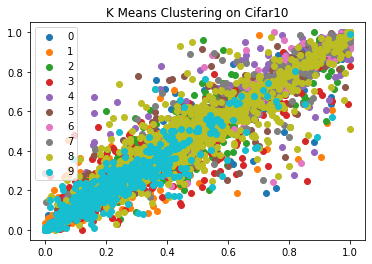

In [312]:
#Data Visualization
cluster_labels = np.unique(y_pred)
cluster_labels = cluster_labels.astype(int)
for i in cluster_labels:
    plt.scatter(x_test[y_pred == i, 0], x_test[y_pred == i, 1], label = i)
plt.legend()
plt.title('K Means Clustering on Cifar10')
plt.show()




Autoencoders implementation

In [299]:
#Autoencoders implementation
encode_dims = 256
print(x_train.shape)
img = keras.Input(shape=(x_train[0].shape[0],))
layer1_encoded = layers.Dense(encode_dims,activation='relu')(img)
layer2_decoded = layers.Dense(x_train[0].shape[0],activation='sigmoid')(layer1_encoded)
autoencoder = keras.Model(img,layer2_decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=512, shuffle=True)


(50000, 1024)
Epoch 1/20
98/98 [==============================] - 2s 17ms/step - loss: 0.6486
Epoch 2/20
98/98 [==============================] - 2s 18ms/step - loss: 0.6166
Epoch 3/20
98/98 [==============================] - 2s 18ms/step - loss: 0.6033
Epoch 4/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5956
Epoch 5/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5900
Epoch 6/20
98/98 [==============================] - 2s 19ms/step - loss: 0.5879
Epoch 7/20
98/98 [==============================] - 2s 19ms/step - loss: 0.5854
Epoch 8/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5849
Epoch 9/20
98/98 [==============================] - 2s 19ms/step - loss: 0.5835
Epoch 10/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5834
Epoch 11/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5822
Epoch 12/20
98/98 [==============================] - 2s 18ms/step - loss: 0.5818
Epoch 13/20
98/98 [====

In [300]:
encoder = keras.Model(img, layer1_encoded)
enc_inp = keras.Input(shape=(encode_dims,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(enc_inp, decoder_layer(enc_inp))
encoded = encoder.predict(x_train)
decoded = decoder.predict(encoded)

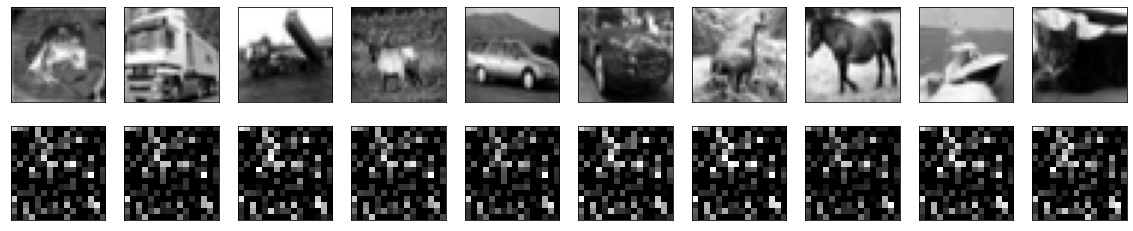

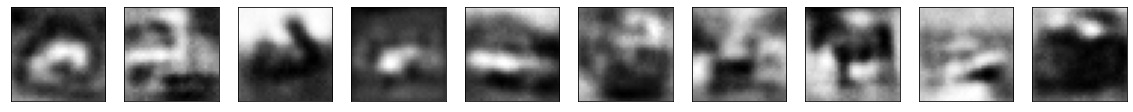

In [301]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(32,32))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16,16))  #[encoded.shape[-1]//2,-1]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.figure(figsize=(20, 4))
for i  in range(n):
  # Display decoded image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(32,32))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [302]:

y_pred = np.zeros(x_train.shape[0])
centroids = knn(20,10, encoded, y_pred)

[44423]
[44423, 28619]
[44423, 28619, 29148]
[44423, 28619, 29148, 6460]
[44423, 28619, 29148, 6460, 14168]
[44423, 28619, 29148, 6460, 14168, 5853]
[44423, 28619, 29148, 6460, 14168, 5853, 24543]
[44423, 28619, 29148, 6460, 14168, 5853, 24543, 12739]
[44423, 28619, 29148, 6460, 14168, 5853, 24543, 12739, 10663]
[44423, 28619, 29148, 6460, 14168, 5853, 24543, 12739, 10663, 38412]
In Cluster_classifying
Calculate_cluster_centre
#iteration-0
In Cluster_classifying
Calculate_cluster_centre
#iteration-1
In Cluster_classifying
Calculate_cluster_centre
#iteration-2
In Cluster_classifying
Calculate_cluster_centre
#iteration-3
In Cluster_classifying
Calculate_cluster_centre
#iteration-4
In Cluster_classifying
Calculate_cluster_centre
#iteration-5
In Cluster_classifying
Calculate_cluster_centre
#iteration-6
In Cluster_classifying
Calculate_cluster_centre
#iteration-7
In Cluster_classifying
Calculate_cluster_centre
#iteration-8
In Cluster_classifying
Calculate_cluster_centre
#iteration-9
In Clus

In [303]:
print(encoded.shape)
print(len(centroids))
# print()
distances = cdist(encoded, centroids ,'euclidean')
print(distances.shape)
# distances = mt.dist(decoded, centroids)
clusters = np.array([np.argmin(i) for i in distances])


(50000, 256)
10
(50000, 10)


In [304]:
sils_score = silhouette_score(encoded,clusters)
print('Silhouette Score- {}'.format(sils_score))

Silhoutte Score- 0.10407095402479172
